PROJECT 1 - PD
ENRIQUE ALMAZÁN SANCHEZ AND JUDITH BRIZ GALERA

### Import Data


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats

# load data from csv and store it
df = pd.read_csv("train_data.txt", header=None)

# we are adding headers to the columns
df.columns = ['Subject Identifier','Jitter in %','Absolute Jitter in microseconds',
        'Jitter as relative amplitude perturbation',
        'Jitter as 5-point period perturbation','Absolute Jitter difference between Jitter Cycles',
        'Shimmer in %','Absolute Shimmer in decibels (dB)','Shimmer as 3 point amplitude perturbation',
        'Shimmer as 5 point amplitude perturbation','Shimmer as 11 point amplitude perturbation',
        'Shimmer as Average absolute difference between amplitude of shimmer cycles',
        'Autocorrelation between NHR and HNR','Noise to Harmonic Ratio (NHR)','Harmonic to Noise Ratio (HNR)',
        'Median Pitch','Mean Pitch','Standard Deviation of Pitch','Minimum Pitch','Maximum Pitch',
        'Number of Pulses','Number of Periods','Mean Period','Standard Deviation of Period',
        'Fraction of unvoiced frames','Number of voice breaks','Degree of voice break',
        'Unified Parkinsons Disease Rating Scale (UPDRS)','PD Indicator']

In [3]:
df

,Subject Identifier,Jitter in %,Absolute Jitter in microseconds,Jitter as relative amplitude perturbation,Jitter as 5-point period perturbation,Absolute Jitter difference between Jitter Cycles,Shimmer in %,Absolute Shimmer in decibels (dB),Shimmer as 3 point amplitude perturbation,Shimmer as 5 point amplitude perturbation,...,Maximum Pitch,Number of Pulses,Number of Periods,Mean Period,Standard Deviation of Period,Fraction of unvoiced frames,Number of voice breaks,Degree of voice break,Unified Parkinsons Disease Rating Scale (UPDRS),PD Indicator
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,40,5.127,0.000398,2.721,2.510,8.162,9.846,0.965,4.593,6.806,...,158.591,63,60,0.007766,0.001066,24.194,2,15.113,1,0
1036,40,1.757,0.000133,0.808,0.690,2.425,7.571,0.740,2.720,3.927,...,143.797,47,44,0.007561,0.000430,46.053,1,25.792,1,0
1037,40,2.912,0.000226,1.141,1.266,3.423,15.489,1.456,6.433,10.138,...,149.641,79,77,0.007767,0.000881,20.000,1,4.574,1,0
1038,40,3.788,0.000275,1.786,1.484,5.359,15.702,1.367,6.374,11.094,...,451.366,75,70,0.007257,0.001714,16.667,3,19.575,1,0


## 1.- Descriptive analysis of the dataset - 'Parkinson Speech'

In this dataset the goal is to **??????????????**
The subjects in this data are 20 Parkinson's Disease (PD) patients and 20 healthy individuals. From all, multiple types of sound recordings (26) are taken.
#### The different features consist of:
- Subject Identifier:
- Jitter in %:
- Absolute Jitter in microseconds:
- Jitter as relative amplitude perturbation:
- Jitter as 5-point period perturbation:
- Absolute Jitter difference between Jitter Cycles:
- Shimmer in %:
- Absolute Shimmer in decibels (dB):
- Shimmer as 3 point amplitude perturbation:
- Shimmer as 5 point amplitude perturbation:
- Shimmer as 11 point amplitude perturbation:
- Shimmer as Average absolute difference between amplitude of shimmer cycles:
- Autocorrelation between NHR and HNR:
- Noise to Harmonic Ratio (NHR):
- Harmonic to Noise Ratio (HNR):
- Median Pitch:
- Mean Pitch:
- Standard Deviation of Pitch:
- Minimum Pitch:
- Maximum Pitch:
- Number of Pulses:
- Number of Periods:
- Mean Period:
- Standard Deviation of Period:
- Fraction of unvoiced frames:
- Number of voice breaks:
- Degree of voice break:
- Unified Parkinsons Disease Rating Scale (UPDRS):
- PD Indicator:


#### Number of entries in the dataset:

In [4]:
df.shape




(1040, 29)

#### Data types:

In [5]:
df.dtypes


Subject Identifier                                                              int64
Jitter in %                                                                   float64
Absolute Jitter in microseconds                                               float64
Jitter as relative amplitude perturbation                                     float64
Jitter as 5-point period perturbation                                         float64
Absolute Jitter difference between Jitter Cycles                              float64
Shimmer in %                                                                  float64
Absolute Shimmer in decibels (dB)                                             float64
Shimmer as 3 point amplitude perturbation                                     float64
Shimmer as 5 point amplitude perturbation                                     float64
Shimmer as 11 point amplitude perturbation                                    float64
Shimmer as Average absolute difference between amplitu

As it can be observed, we are working with integer and float values. Therefore, there is no categorical data.



In [6]:
# This returns True if there are any missing values in the data and False otherwise.
df.isnull().values.any()

False

There are no null values in the dataset.

In [7]:
df["PD Indicator"].value_counts() 

1    520
0    520
Name: PD Indicator, dtype: int64

As it can be seen, the classes are perfectly balanced, with 50% healthy and 50% PD participants.

## 2.- Data Separation

In [9]:
training = df.sample(frac=0.7, random_state=150)
test = df.drop(training.index).sample(frac=1.0)

## 3.- Data Visualization

array([[<AxesSubplot:title={'center':'Subject Identifier'}>,
        <AxesSubplot:title={'center':'Jitter in %'}>,
        <AxesSubplot:title={'center':'Absolute Jitter in microseconds'}>,
        <AxesSubplot:title={'center':'Jitter as relative amplitude perturbation'}>,
        <AxesSubplot:title={'center':'Jitter as 5-point period perturbation'}>],
       [<AxesSubplot:title={'center':'Absolute Jitter difference between Jitter Cycles'}>,
        <AxesSubplot:title={'center':'Shimmer in %'}>,
        <AxesSubplot:title={'center':'Absolute Shimmer in decibels (dB)'}>,
        <AxesSubplot:title={'center':'Shimmer as 3 point amplitude perturbation'}>,
        <AxesSubplot:title={'center':'Shimmer as 5 point amplitude perturbation'}>],
       [<AxesSubplot:title={'center':'Shimmer as 11 point amplitude perturbation'}>,
        <AxesSubplot:title={'center':'Shimmer as Average absolute difference between amplitude of shimmer cycles'}>,
        <AxesSubplot:title={'center':'Autocorrelation

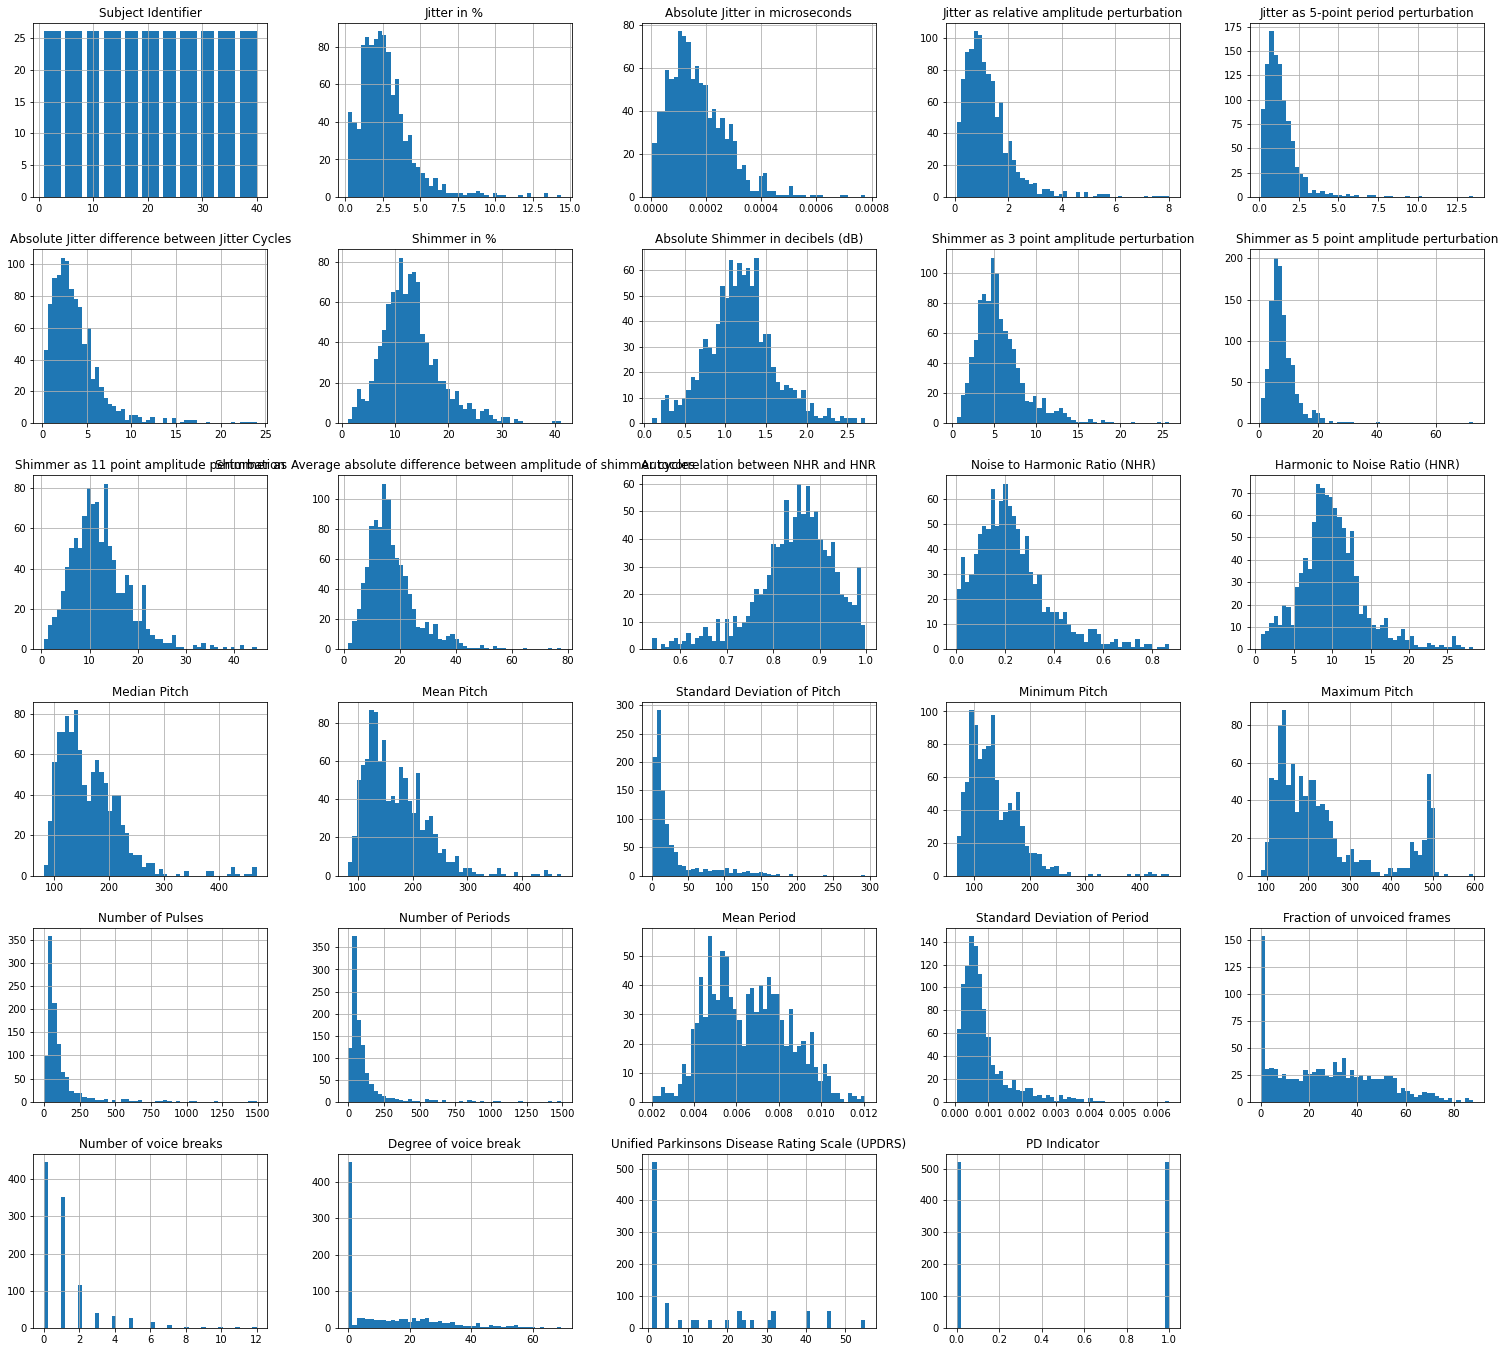

In [13]:
df.hist(figsize=(26 , 24),bins=50)

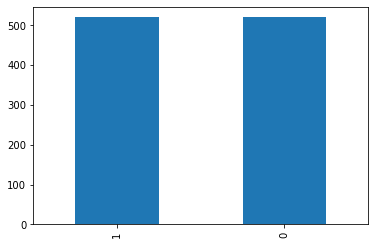

In [16]:
tryy = df["PD Indicator"].value_counts().plot.bar()
plt.show(tryy)

BOXPLOTS:

<function matplotlib.pyplot.show(close=None, block=None)>

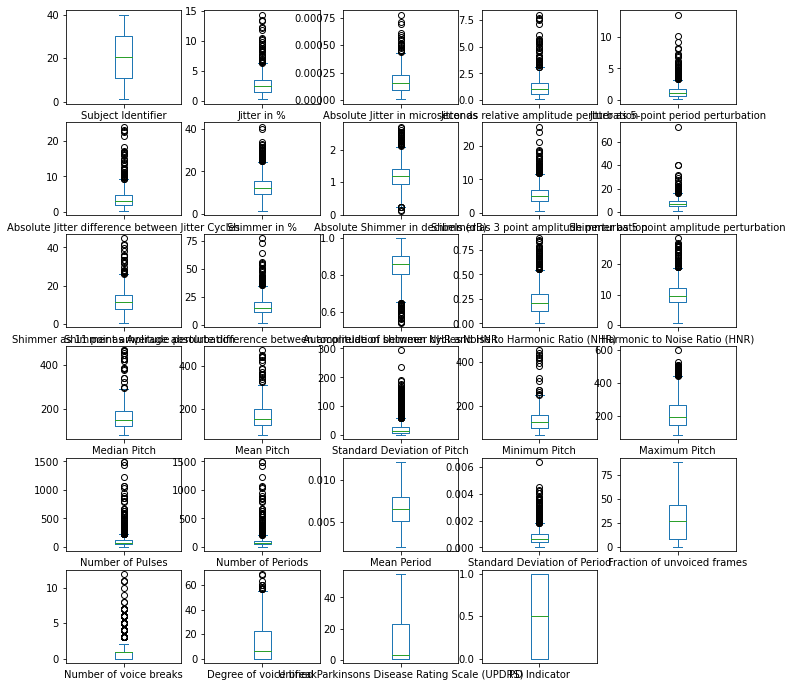

In [22]:
df.plot(kind='box',subplots=True,layout=(6,5),sharex = False, figsize=(12,12))
plt.show

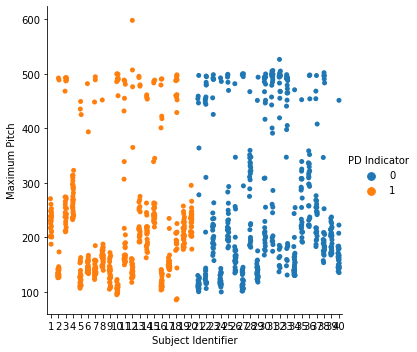

In [35]:
sns.catplot(data=df,x='Subject Identifier',y='Maximum Pitch',hue='PD Indicator')

OUTLIERS:

In [27]:
# calculate z-scores with stats
z_scores = stats.zscore(df['PD Indicator'])

# Here, we are considering 3 times the standard desviation. 
# Change this evalute and evalute the results
abs_z_scores = np.abs(z_scores)
no_outliers = (abs_z_scores < 3)
new_data = df[no_outliers]

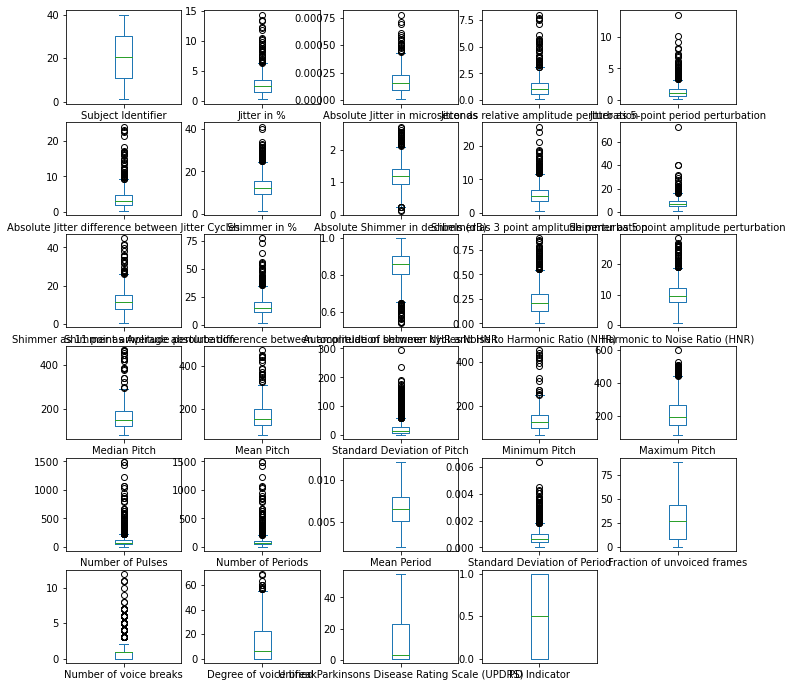

In [31]:
df.plot(kind='box',subplots=True, layout=(6,5), sharex=False, sharey=False, figsize=(12,12))
plt.show()

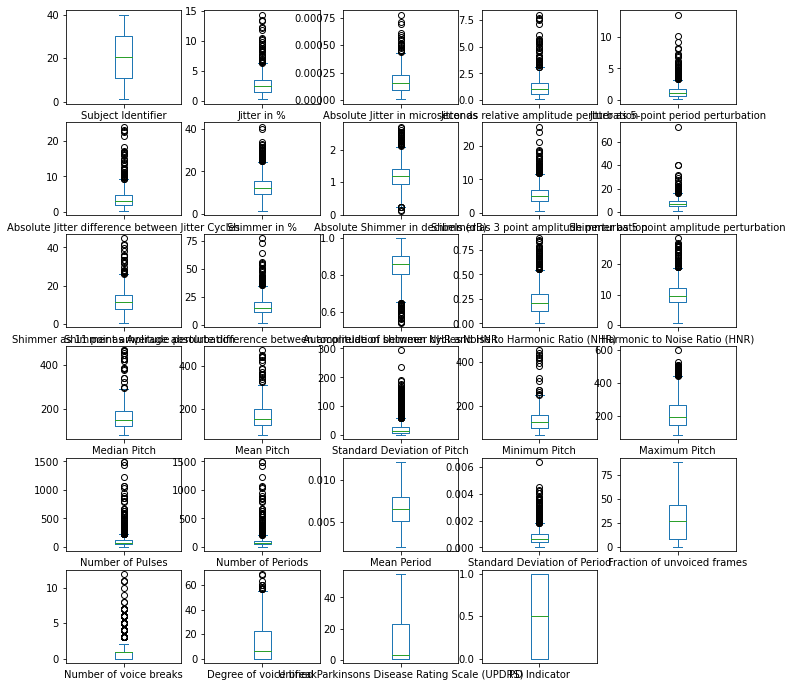

In [33]:
new_data.plot(kind='box',subplots=True, layout=(6,5), sharex=False, sharey=False, figsize=(12,12))
plt.show()

Regarding the last 2 commands, the first set of box plots (df.plot(...)) shows the original data with all the outliers included, while the second set of box plots (new_data.plot(...)) shows the data with the outliers removed based on the z-score criterion.